In [1]:
import pandas as pd
import numpy as np
#importando data
dados = pd.read_csv("Dados_totais.csv")
dados_generos =  pd.read_csv("data_by_genres.csv")
dados_anos = pd.read_csv('data_by_year.csv')

#Removendo colunas que não influenciaram 
dados.drop(['explicit','key','mode'],axis=1)

dados_generos.drop(['key','mode'],axis=1)

#Recomendando musicas pós anos 2000
dados_anos = dados_anos[dados_anos["year"]>=2000]
dados_anos.drop(['mode','key'],axis=1)

dados_generos = dados_generos.drop(["mode"], axis=1)
dados_generos1 = dados_generos.drop(['genres'],axis=1)



In [2]:
dados_anos.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
79,1,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049,7
80,1,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125,7
81,1,2002,0.282624,0.576160,239503.283000,0.641270,0.088048,0.193911,-7.686640,0.084308,119.239738,0.542397,48.655500,7
82,1,2003,0.256471,0.575763,244670.575230,0.660165,0.083049,0.196976,-7.485545,0.093926,120.914622,0.530504,48.626407,7
83,1,2004,0.280559,0.567680,237378.708037,0.648868,0.077934,0.202199,-7.601655,0.094239,121.290346,0.524489,49.273143,7


In [3]:
dados_generos.head(5)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [6]:
dados.head(5)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [8]:
#importando biblioteca e metods do sklearning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

SEED = 1224
np.random.seed(1224)
#(Pipeline) Arranjo de dados ///(StandardScaler) Padronizando os dados /// (PCA) reduz a dimensionalidade do cluster
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])

genre_embedding_pca = pca_pipeline.fit_transform(dados_generos1)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)



,x,y
0,5.896406,-0.006806
1,2.801172,4.496443
2,-0.776968,-1.256120
3,0.996612,-0.927628
4,0.731901,-0.996864


In [9]:
from sklearn.cluster import KMeans
# calculo das disntancias entre elementos
kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)

kmeans_pca.fit(projection)

dados_generos['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

projection['generos'] = dados_generos['genres']

Initialization complete
Iteration 0, inertia 4925.510210854367.
Iteration 1, inertia 3917.6207813509004.
Iteration 2, inertia 3727.719609936476.
Iteration 3, inertia 3633.499679879923.
Iteration 4, inertia 3591.660718256437.
Iteration 5, inertia 3567.988210155443.
Iteration 6, inertia 3554.9358211191193.
Iteration 7, inertia 3548.8135424299353.
Iteration 8, inertia 3544.013714298003.
Iteration 9, inertia 3540.362188249841.
Iteration 10, inertia 3536.7065026406913.
Iteration 11, inertia 3531.39132748425.
Iteration 12, inertia 3527.6872332830358.
Iteration 13, inertia 3525.2601315402408.
Iteration 14, inertia 3522.672621959629.
Iteration 15, inertia 3520.2711867475027.
Iteration 16, inertia 3518.5517352097822.
Iteration 17, inertia 3516.5565021363873.
Iteration 18, inertia 3514.848608154107.
Iteration 19, inertia 3514.363347212923.
Converged at iteration 19: center shift 0.0001943186544327839 within tolerance 0.0002716279904382959.


In [28]:
from sklearn.preprocessing import OneHotEncoder
#Usando dummies 
ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()
dados2 = dados.drop('artists', axis=1)

dados_musicas_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))], axis=1)
dados_musicas_dummies

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))])


music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['id','name','artists_song'], axis=1))
projection_m = pd.DataFrame(data=music_embedding_pca)

kmeans_pca_pipeline = KMeans(n_clusters=50, verbose=False, random_state=SEED)

kmeans_pca_pipeline.fit(projection_m)

dados['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)


projection_m['artist'] = dados['artists']
projection_m['song'] = dados['artists_song']

projection.head()

,x,y,cluster_pca,generos
0,5.896406,-0.006806,2,21st century classical
1,2.801172,4.496443,1,432hz
2,-0.776968,-1.256120,0,8-bit
3,0.996612,-0.927628,3,[]
4,0.731901,-0.996864,3,a cappella


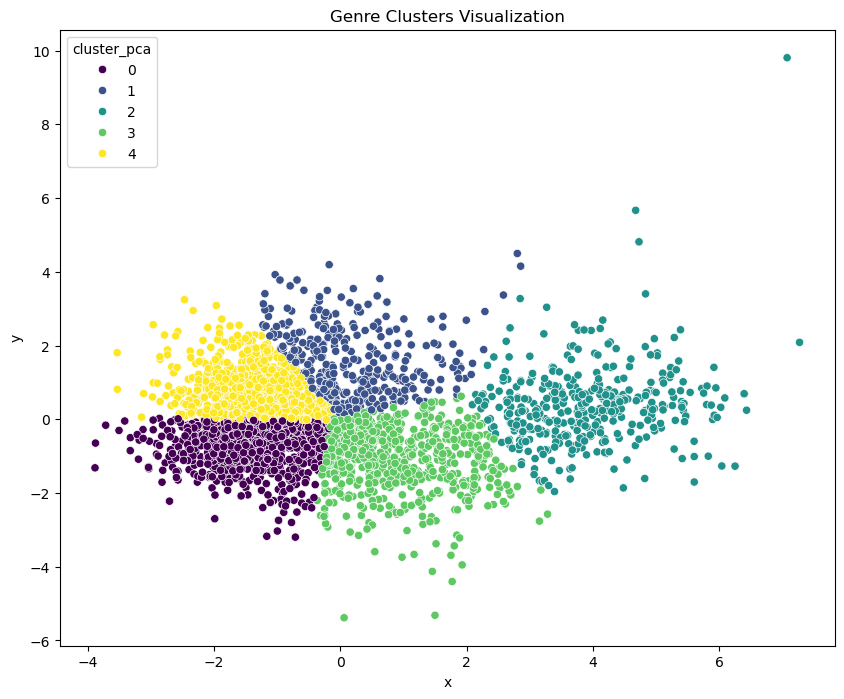

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization of Genre Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=projection, x='x', y='y', hue='cluster_pca', palette='viridis')
plt.title('Genre Clusters Visualization')
plt.show()


In [32]:
# Interactive plot for Genre Clusters
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(
    projection, x='x', y='y', color='cluster_pca',hover_data='generos',
    title='Genre Clusters Visualization', labels={'x': 'PCA Component 1', 'y': 'PCA Component 2'}
)

# Adding hover information
fig.update_traces(marker=dict(size=5), selector=dict(mode='markers+text'))

fig.update_layout(
    hovermode='closest',
    margin=dict(l=0, r=0, t=40, b=0),
    height=800,
    showlegend=True

)

ValueError: Value of 'hover_data_0' is not the name of a column in 'data_frame'. Expected one of ['x', 'y', 'cluster_pca', 'generos'] but received: genero

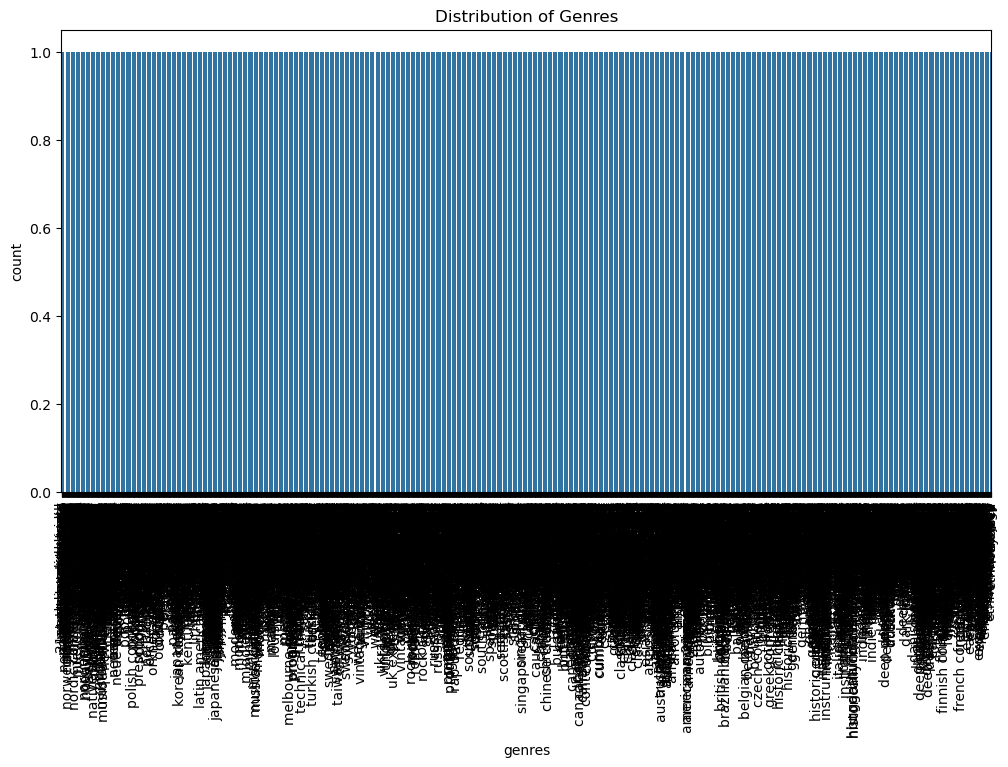

In [14]:
# Distribution of Genres
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_generos, x='genres', order=dados_generos['genres'].value_counts().index)
plt.title('Distribution of Genres')
plt.xticks(rotation=90)
plt.show()

In [11]:
def Recomendador_Musica(nome_musica):
    from sklearn.metrics.pairwise import euclidean_distances

    #Buscando elemetos de menor distância do nosso parametro
    cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]
    
    musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]
    x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
    y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]

    #distâncias euclidianas
    distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
    musicas_recomendadas['id'] = dados['id']
    musicas_recomendadas['distancias']= distancias
    recomendada = musicas_recomendadas.sort_values('distancias').head(10)
    muscias_validas = recomendada['song'].to_string(index=False)
    
    return muscias_validas


In [12]:
nome_musica = str(input("Qual música você acabou de ouvir: "))


print("Aqui estão algumas que você deve ouvir em seguida: \n{}".format(Recomendador_Musica(nome_musica)))

     

IndexError: list index out of range